In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pebench.2016.04.csv')
df.describe(include='all')

,start_time,command,suite,concurrent_level,dataset,dataset_size_gb,cluster_name,cluster_cores,cluster_mem_gb,result,running_time,note
count,26082,26082,26082,26082.000000,26082,26082.00000,26082,26082.000000,26082.000000,26082,26082.000000,0.0
unique,171,7,1,NaN,9,NaN,6,NaN,NaN,1,NaN,NaN
top,2016-36-26T03:36:20,"ddf[ddf.origin == 'ORD', ddf.colnames].result....",smartquery,NaN,flight0024,NaN,bench64x,NaN,NaN,success,NaN,NaN
freq,336,3726,26082,NaN,3654,NaN,5481,NaN,NaN,26082,NaN,NaN
mean,NaN,NaN,NaN,11.628019,NaN,185.65942,NaN,198.041868,792.167472,NaN,126.874081,NaN
std,NaN,NaN,NaN,5.120087,NaN,321.83075,NaN,180.598662,722.394649,NaN,332.763540,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.00000,NaN,16.000000,64.000000,NaN,0.056439,NaN
25%,NaN,NaN,NaN,8.000000,NaN,12.00000,NaN,32.000000,128.000000,NaN,1.225461,NaN
50%,NaN,NaN,NaN,16.000000,NaN,48.00000,NaN,128.000000,512.000000,NaN,4.180688,NaN
75%,NaN,NaN,NaN,16.000000,NaN,192.00000,NaN,256.000000,1024.000000,NaN,54.398449,NaN


In [3]:
# filter for only SQ suite and relevant columns
d = df[df.suite == 'smartquery'][['cluster_cores', 'concurrent_level', 'dataset_size_gb', 'running_time']]
d.describe()

,cluster_cores,concurrent_level,dataset_size_gb,running_time
count,26082.000000,26082.000000,26082.00000,26082.000000
mean,198.041868,11.628019,185.65942,126.874081
std,180.598662,5.120087,321.83075,332.763540
min,16.000000,1.000000,1.00000,0.056439
25%,32.000000,8.000000,12.00000,1.225461
50%,128.000000,16.000000,48.00000,4.180688
75%,256.000000,16.000000,192.00000,54.398449
max,512.000000,16.000000,1536.00000,3050.413374


In [4]:
group = d.groupby(('cluster_cores', 'dataset_size_gb', 'concurrent_level'))
agg = group.agg([np.median, np.mean, np.var])
agg

running_time              \
                                                     median        mean   
cluster_cores dataset_size_gb concurrent_level                            
16            1               1                    0.527952    1.075986   
                              4                    1.802572    2.404551   
                              16                   8.244876    9.417306   
              12              1                    0.546624    4.815169   
                              4                    2.564776   16.450013   
                              8                    3.760370   35.132183   
                              16                  15.912826   68.996931   
              24              1                    0.667211    8.485501   
                              4                    3.413527   35.473174   
                              8                    4.852107   70.731318   
                              16                  25.190401  137.676355   
              48              1                    0.765657   17.275630   
                              4                    4.498820   88.467879   
                              8                    8.714885  177.425741   
                              16                  40.455705  363.105545   
              96              1                    1.890839   45.384870   
                              4                    7.254174  189.319167   
                              8                   12.562060  352.892198   
                              16                 105.676237  681.386322   
32            1               1                    0.556182    0.976679   
                              4                    1.207240    1.452409   
                              8                    1.830802    2.433351   
                              16                   2.791706    4.602212   
              12              1                    0.507682    2.816608   
                              4                    3.541751    9.005275   
                              8                    3.370989   17.301246   
                              16                   5.224702   36.717273   
              24              1                    0.591980    5.199331   
                              4                    3.598745   19.561999   
                              8                    3.159355   36.065105   
...                                                     ...         ...   
512           12              8                    1.520039    1.763004   
                              16                   2.084292    3.360891   
              24              1                    0.581304    1.023069   
                              4                    1.066541    1.657104   
                              8                    2.492004    2.832935   
                              16                   3.371166    5.716435   
              48              1                    0.707716    1.463671   
                              4                    2.354923    3.037316   
                              8                    2.903976    5.508343   
                              16                   3.117518   12.260829   
              96              1                    0.908503    2.379958   
                              4                    3.431406    5.586161   
                              8                    3.088805   13.699820   
                              16                   3.256588   26.659829   
              192             1                    1.451978    3.782689   
                              4                    3.998443   10.498210   
                              8                    3.541181   21.405703   
                              16                   4.487545   44.780386   
              384             1                    2.509522    7.143321   
                              4                    4.575943   21.838904 

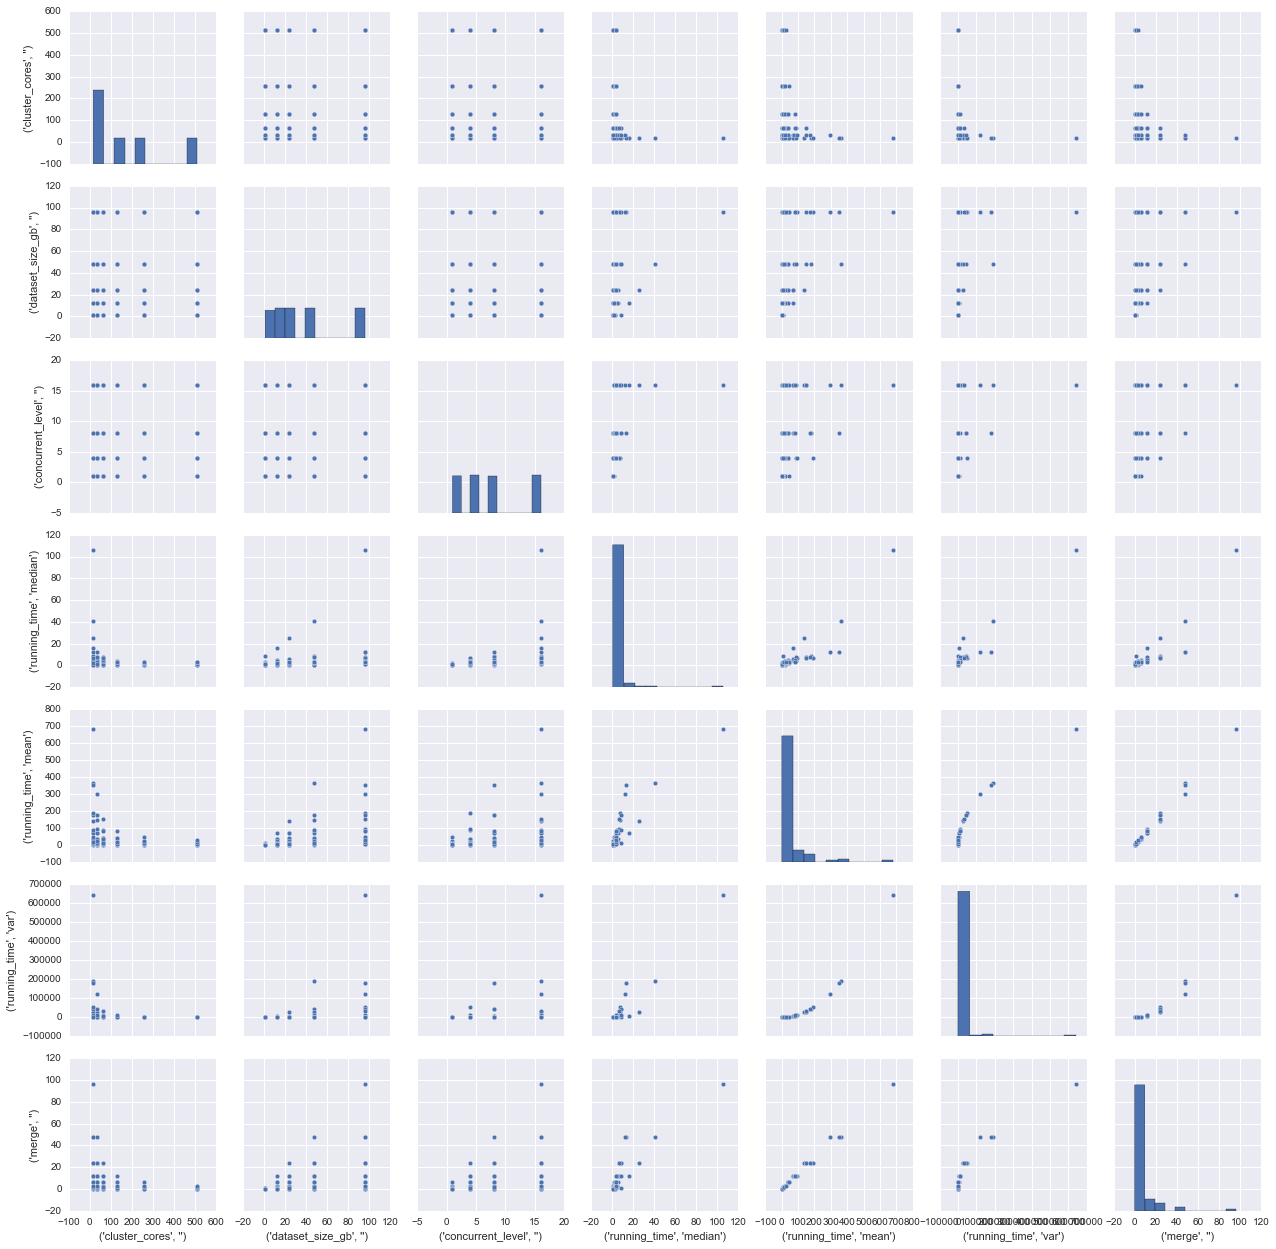

In [5]:
agg = agg.reset_index()
agg = agg[agg.dataset_size_gb < 192]
agg['merge'] = agg.dataset_size_gb * agg.concurrent_level / agg.cluster_cores
sns.pairplot(agg)

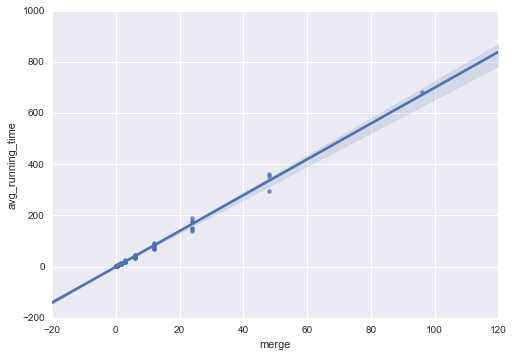

In [6]:
agg['avg_running_time'] = agg['running_time']['mean']
sns.regplot('merge', 'avg_running_time', data=agg)

0.993164633363


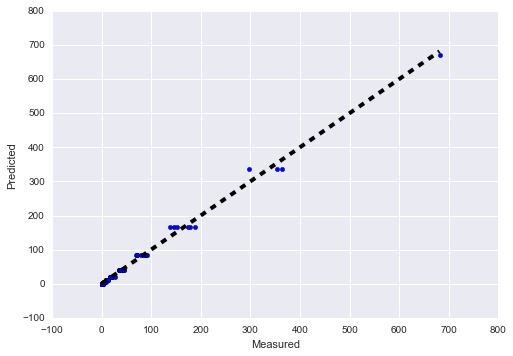

[ 7.0044157] -0.732886767993


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict

X = agg[['merge']].values
y = agg['avg_running_time'].values
lr = LinearRegression(fit_intercept=True, normalize=False)
lr.fit(X, y)
predicted = lr.predict(X)

print lr.score(X, y)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print lr.coef_, lr.intercept_

In [9]:
def predict_running_time_merge(r):
    return - 0.732886767993 + 7.0044157 * r['merge']

agg['predict_running_time_merge'] = agg.apply(predict_running_time_merge, axis=1)


rmse = np.sqrt(np.sum(np.power(agg['predict_running_time_merge'] - agg['avg_running_time'], 2)) / len(agg))
print 'rmse: {}'.format(rmse)
agg

rmse: 7.16702715029


cluster_cores dataset_size_gb concurrent_level running_time              \
                                                         median        mean   
0              16               1                1     0.527952    1.075986   
1              16               1                4     1.802572    2.404551   
2              16               1               16     8.244876    9.417306   
3              16              12                1     0.546624    4.815169   
4              16              12                4     2.564776   16.450013   
5              16              12                8     3.760370   35.132183   
6              16              12               16    15.912826   68.996931   
7              16              24                1     0.667211    8.485501   
8              16              24                4     3.413527   35.473174   
9              16              24                8     4.852107   70.731318   
10             16              24               16    25.190401  137.676355   
11             16              48                1     0.765657   17.275630   
12             16              48                4     4.498820   88.467879   
13             16              48                8     8.714885  177.425741   
14             16              48               16    40.455705  363.105545   
15             16              96                1     1.890839   45.384870   
16             16              96                4     7.254174  189.319167   
17             16              96                8    12.562060  352.892198   
18             16              96               16   105.676237  681.386322   
19             32               1                1     0.556182    0.976679   
20             32               1                4     1.207240    1.452409   
21             32               1                8     1.830802    2.433351   
22             32               1               16     2.791706    4.602212   
23             32              12                1     0.507682    2.816608   
24             32              12                4     3.541751    9.005275   
25             32              12                8     3.370989   17.301246   
26             32              12               16     5.224702   36.717273   
27             32              24                1     0.591980    5.199331   
28             32              24                4     3.598745   19.561999   
29             32              24                8     3.159355   36.065105   
..            ...             ...              ...          ...         ...   
111           256              24                8     2.372473    5.145895   
112           256              24               16     2.845175   10.533428   
113           256              48                1     0.657959    2.203365   
114           256              48                4     2.772573    6.508189   
115           256              48                8     2.762289   10.649481   
116           256              48               16     3.064729   20.813069   
117           256              96                1     0.958397    3.502563   
118           256              96                4     2.357230   13.049241   
119           256              96                8     3.421887   20.844919   
120           256              96               16     3.539911   45.912725   
135           512               1                1     0.476990    0.810400   
136           512               1                4     0.649475    0.937830   
137           512               1                8     0.929368    1.098201   
138           512               1               16     1.438549    1.399712   
139           512              12                1     0.489883    0.904268   
140           512              12                4     0.744913    1.132820   
141           512              12                8     1.520039    1.763004   
142           512              12               16    

In [10]:
# simple prediction
def predict_running_time_simple(r):
    return 7 * r['concurrent_level'] * r['dataset_size_gb'] / r['cluster_cores']

agg['predict_running_time_simple'] = agg.apply(predict_running_time_simple, axis=1)
agg.set_index(['cluster_cores', 'dataset_size_gb', 'concurrent_level'])

rmse = np.sqrt(np.sum(np.power(agg['predict_running_time_simple'] - agg['running_time']['mean'], 2)) / len(agg))
print 'rmse: {}'.format(rmse)
agg

rmse: 7.20219078344


cluster_cores dataset_size_gb concurrent_level running_time              \
                                                         median        mean   
0              16               1                1     0.527952    1.075986   
1              16               1                4     1.802572    2.404551   
2              16               1               16     8.244876    9.417306   
3              16              12                1     0.546624    4.815169   
4              16              12                4     2.564776   16.450013   
5              16              12                8     3.760370   35.132183   
6              16              12               16    15.912826   68.996931   
7              16              24                1     0.667211    8.485501   
8              16              24                4     3.413527   35.473174   
9              16              24                8     4.852107   70.731318   
10             16              24               16    25.190401  137.676355   
11             16              48                1     0.765657   17.275630   
12             16              48                4     4.498820   88.467879   
13             16              48                8     8.714885  177.425741   
14             16              48               16    40.455705  363.105545   
15             16              96                1     1.890839   45.384870   
16             16              96                4     7.254174  189.319167   
17             16              96                8    12.562060  352.892198   
18             16              96               16   105.676237  681.386322   
19             32               1                1     0.556182    0.976679   
20             32               1                4     1.207240    1.452409   
21             32               1                8     1.830802    2.433351   
22             32               1               16     2.791706    4.602212   
23             32              12                1     0.507682    2.816608   
24             32              12                4     3.541751    9.005275   
25             32              12                8     3.370989   17.301246   
26             32              12               16     5.224702   36.717273   
27             32              24                1     0.591980    5.199331   
28             32              24                4     3.598745   19.561999   
29             32              24                8     3.159355   36.065105   
..            ...             ...              ...          ...         ...   
111           256              24                8     2.372473    5.145895   
112           256              24               16     2.845175   10.533428   
113           256              48                1     0.657959    2.203365   
114           256              48                4     2.772573    6.508189   
115           256              48                8     2.762289   10.649481   
116           256              48               16     3.064729   20.813069   
117           256              96                1     0.958397    3.502563   
118           256              96                4     2.357230   13.049241   
119           256              96                8     3.421887   20.844919   
120           256              96               16     3.539911   45.912725   
135           512               1                1     0.476990    0.810400   
136           512               1                4     0.649475    0.937830   
137           512               1                8     0.929368    1.098201   
138           512               1               16     1.438549    1.399712   
139           512              12                1     0.489883    0.904268   
140           512              12                4     0.744913    1.132820   
141           512              12                8     1.520039    1.763004   
142           512              12               16    

In [13]:
from sklearn.metrics import r2_score
r2_score(agg['running_time']['mean'], agg['predict_running_time_simple'])

0.99309739601309666